In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import tensorflow as tf

In [2]:
# Read in crime_weather data to be used for model
df = pd.read_csv(Path("../cleaned_data_2015_2018/combined_data/crime_weather_data_2015_2018.csv"))
df

,date,max_temperature,min_temperature,max_relative_humidity,avg_relative_humidity,avg_pressure_sea,max_wind_speed,precipitation,rain,snow,...,occ_dow,assault_count,auto_theft_count,bicycle_theft_count,break_and_enter_count,homicide_count,robbery_count,shooting_count,theft_from_motor_vehicle_count,theft_over_count
0,2018-12-31,5.0,-2.5,94,79.5,100.78,21,13.6,13.6,0.0,...,Monday,38,14,2,20,0,11,0,23,4
1,2018-12-30,0.7,-6.6,88,78.0,102.03,24,1.2,0.0,1.6,...,Sunday,43,8,3,22,0,7,0,22,3
2,2018-12-29,2.7,-7.0,80,68.0,101.86,34,0.0,0.0,0.0,...,Saturday,37,10,3,26,0,7,0,21,4
3,2018-12-28,12.4,2.7,95,84.5,100.89,30,1.8,1.8,0.0,...,Friday,35,13,2,21,0,12,0,31,1
4,2018-12-27,2.8,-7.4,87,74.0,102.52,30,5.4,5.4,0.0,...,Thursday,38,7,2,21,0,7,0,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2015-01-05,-5.8,-14.4,83,69.5,102.38,45,0.8,0.0,0.8,...,Monday,39,6,1,24,0,5,1,31,2
1457,2015-01-04,4.3,-5.9,98,82.5,100.69,43,6.8,6.4,0.4,...,Sunday,44,5,1,11,0,5,0,33,1
1458,2015-01-03,1.5,-5.8,97,82.5,101.96,29,10.8,8.0,2.4,...,Saturday,37,10,0,4,0,8,0,21,3
1459,2015-01-02,-1.0,-6.1,83,66.0,102.30,36,0.6,0.0,0.4,...,Friday,34,9,4,18,0,6,0,34,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            1461 non-null   object 
 1   max_temperature                 1461 non-null   float64
 2   min_temperature                 1461 non-null   float64
 3   max_relative_humidity           1461 non-null   int64  
 4   avg_relative_humidity           1461 non-null   float64
 5   avg_pressure_sea                1461 non-null   float64
 6   max_wind_speed                  1461 non-null   int64  
 7   precipitation                   1461 non-null   float64
 8   rain                            1461 non-null   float64
 9   snow                            1461 non-null   float64
 10  snow_on_ground                  1461 non-null   float64
 11  daylight                        1461 non-null   float64
 12  avg_cloud_cover_8               14

In [4]:
# Convert date into Unix timestamp for NN model
from datetime import datetime
df['date'] = pd.to_datetime(df['date'])
df['unix_timestamp'] = df['date'].apply(lambda x: x.timestamp()).astype(int)
df

,date,max_temperature,min_temperature,max_relative_humidity,avg_relative_humidity,avg_pressure_sea,max_wind_speed,precipitation,rain,snow,...,assault_count,auto_theft_count,bicycle_theft_count,break_and_enter_count,homicide_count,robbery_count,shooting_count,theft_from_motor_vehicle_count,theft_over_count,unix_timestamp
0,2018-12-31,5.0,-2.5,94,79.5,100.78,21,13.6,13.6,0.0,...,38,14,2,20,0,11,0,23,4,1546214400
1,2018-12-30,0.7,-6.6,88,78.0,102.03,24,1.2,0.0,1.6,...,43,8,3,22,0,7,0,22,3,1546128000
2,2018-12-29,2.7,-7.0,80,68.0,101.86,34,0.0,0.0,0.0,...,37,10,3,26,0,7,0,21,4,1546041600
3,2018-12-28,12.4,2.7,95,84.5,100.89,30,1.8,1.8,0.0,...,35,13,2,21,0,12,0,31,1,1545955200
4,2018-12-27,2.8,-7.4,87,74.0,102.52,30,5.4,5.4,0.0,...,38,7,2,21,0,7,0,30,1,1545868800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2015-01-05,-5.8,-14.4,83,69.5,102.38,45,0.8,0.0,0.8,...,39,6,1,24,0,5,1,31,2,1420416000
1457,2015-01-04,4.3,-5.9,98,82.5,100.69,43,6.8,6.4,0.4,...,44,5,1,11,0,5,0,33,1,1420329600
1458,2015-01-03,1.5,-5.8,97,82.5,101.96,29,10.8,8.0,2.4,...,37,10,0,4,0,8,0,21,3,1420243200
1459,2015-01-02,-1.0,-6.1,83,66.0,102.30,36,0.6,0.0,0.4,...,34,9,4,18,0,6,0,34,2,1420156800


In [5]:
# Remove date column
df.drop(columns=["date"], axis=1, inplace=True)
df

,max_temperature,min_temperature,max_relative_humidity,avg_relative_humidity,avg_pressure_sea,max_wind_speed,precipitation,rain,snow,snow_on_ground,...,assault_count,auto_theft_count,bicycle_theft_count,break_and_enter_count,homicide_count,robbery_count,shooting_count,theft_from_motor_vehicle_count,theft_over_count,unix_timestamp
0,5.0,-2.5,94,79.5,100.78,21,13.6,13.6,0.0,0.0,...,38,14,2,20,0,11,0,23,4,1546214400
1,0.7,-6.6,88,78.0,102.03,24,1.2,0.0,1.6,2.0,...,43,8,3,22,0,7,0,22,3,1546128000
2,2.7,-7.0,80,68.0,101.86,34,0.0,0.0,0.0,0.0,...,37,10,3,26,0,7,0,21,4,1546041600
3,12.4,2.7,95,84.5,100.89,30,1.8,1.8,0.0,0.0,...,35,13,2,21,0,12,0,31,1,1545955200
4,2.8,-7.4,87,74.0,102.52,30,5.4,5.4,0.0,0.0,...,38,7,2,21,0,7,0,30,1,1545868800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,-5.8,-14.4,83,69.5,102.38,45,0.8,0.0,0.8,1.0,...,39,6,1,24,0,5,1,31,2,1420416000
1457,4.3,-5.9,98,82.5,100.69,43,6.8,6.4,0.4,0.0,...,44,5,1,11,0,5,0,33,1,1420329600
1458,1.5,-5.8,97,82.5,101.96,29,10.8,8.0,2.4,0.0,...,37,10,0,4,0,8,0,21,3,1420243200
1459,-1.0,-6.1,83,66.0,102.30,36,0.6,0.0,0.4,0.0,...,34,9,4,18,0,6,0,34,2,1420156800


In [6]:
# Encode the day of week column
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit encoder and create dataframe
encode_df = pd.DataFrame(enc.fit_transform(df['occ_dow'].values.reshape(-1,1)))

# rename encoded columns
encode_df.columns = enc.get_feature_names_out(['occ_dow'])
encode_df

,occ_dow_Friday,occ_dow_Monday,occ_dow_Saturday,occ_dow_Sunday,occ_dow_Thursday,occ_dow_Tuesday,occ_dow_Wednesday
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
1456,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1458,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1459,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Merge the 2 DataFrames together and drop the occ_down column
df = df.merge(encode_df, left_index=True, right_index=True).drop("occ_dow", axis=1)
df

,max_temperature,min_temperature,max_relative_humidity,avg_relative_humidity,avg_pressure_sea,max_wind_speed,precipitation,rain,snow,snow_on_ground,...,theft_from_motor_vehicle_count,theft_over_count,unix_timestamp,occ_dow_Friday,occ_dow_Monday,occ_dow_Saturday,occ_dow_Sunday,occ_dow_Thursday,occ_dow_Tuesday,occ_dow_Wednesday
0,5.0,-2.5,94,79.5,100.78,21,13.6,13.6,0.0,0.0,...,23,4,1546214400,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.7,-6.6,88,78.0,102.03,24,1.2,0.0,1.6,2.0,...,22,3,1546128000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.7,-7.0,80,68.0,101.86,34,0.0,0.0,0.0,0.0,...,21,4,1546041600,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,12.4,2.7,95,84.5,100.89,30,1.8,1.8,0.0,0.0,...,31,1,1545955200,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.8,-7.4,87,74.0,102.52,30,5.4,5.4,0.0,0.0,...,30,1,1545868800,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,-5.8,-14.4,83,69.5,102.38,45,0.8,0.0,0.8,1.0,...,31,2,1420416000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,4.3,-5.9,98,82.5,100.69,43,6.8,6.4,0.4,0.0,...,33,1,1420329600,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1458,1.5,-5.8,97,82.5,101.96,29,10.8,8.0,2.4,0.0,...,21,3,1420243200,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1459,-1.0,-6.1,83,66.0,102.30,36,0.6,0.0,0.4,0.0,...,34,2,1420156800,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Reorganize the dataframe to contain all features first and all intended features at the end

df = df[['max_temperature', 'min_temperature', 'max_relative_humidity',
       'avg_relative_humidity', 'avg_pressure_sea', 'max_wind_speed',
       'precipitation', 'rain', 'snow', 'snow_on_ground', 'daylight',
       'avg_cloud_cover_8', 'unix_timestamp',
       'occ_dow_Monday', 'occ_dow_Tuesday',  'occ_dow_Wednesday', 'occ_dow_Thursday', 
       'occ_dow_Friday', 'occ_dow_Saturday', 'occ_dow_Sunday',
       'assault_count', 'auto_theft_count','bicycle_theft_count', 
       'break_and_enter_count', 'homicide_count',
       'robbery_count', 'shooting_count', 'theft_from_motor_vehicle_count',
       'theft_over_count']]

#

## Create first NN model structure using a target column name

In [9]:
# Print column names to see which columns to use
df.columns

Index(['max_temperature', 'min_temperature', 'max_relative_humidity',
       'avg_relative_humidity', 'avg_pressure_sea', 'max_wind_speed',
       'precipitation', 'rain', 'snow', 'snow_on_ground', 'daylight',
       'avg_cloud_cover_8', 'unix_timestamp', 'occ_dow_Monday',
       'occ_dow_Tuesday', 'occ_dow_Wednesday', 'occ_dow_Thursday',
       'occ_dow_Friday', 'occ_dow_Saturday', 'occ_dow_Sunday', 'assault_count',
       'auto_theft_count', 'bicycle_theft_count', 'break_and_enter_count',
       'homicide_count', 'robbery_count', 'shooting_count',
       'theft_from_motor_vehicle_count', 'theft_over_count'],
      dtype='object')

In [10]:
# Define X and y column names
X_cols = ['max_temperature', 'min_temperature', 'max_relative_humidity',
       'avg_relative_humidity', 'avg_pressure_sea', 'max_wind_speed',
       'precipitation', 'rain', 'snow', 'snow_on_ground', 'daylight',
       'avg_cloud_cover_8', 'unix_timestamp', 'occ_dow_Friday',
       'occ_dow_Monday', 'occ_dow_Saturday', 'occ_dow_Sunday',
       'occ_dow_Thursday', 'occ_dow_Tuesday', 'occ_dow_Wednesday']

y_col = 'assault_count'

# Define features and target
X = df[X_cols]
y = df[y_col].values.reshape(-1,1)

In [11]:
# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
# Standardize data with Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler
X_scaler = scaler.fit(X_train)

# Scale the features
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.fit_transform(X_test)

In [13]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = number_input_features * 3
hidden_nodes_layer2 = number_input_features

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                1260      
                                                                 
 dense_1 (Dense)             (None, 20)                1220      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,501
Trainable params: 2,501
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mae"])

In [15]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
35/35 [==============================] - 0s 1ms/step - loss: 1935.6747 - mae: 42.2950
Epoch 2/100
35/35 [==============================] - 0s 941us/step - loss: 1570.1045 - mae: 37.6986
Epoch 3/100
35/35 [==============================] - 0s 838us/step - loss: 1024.3718 - mae: 29.3104
Epoch 4/100
35/35 [==============================] - 0s 824us/step - loss: 486.1699 - mae: 17.9111
Epoch 5/100
35/35 [==============================] - 0s 868us/step - loss: 231.4168 - mae: 10.6267
Epoch 6/100
35/35 [==============================] - 0s 883us/step - loss: 179.2911 - mae: 8.9220
Epoch 7/100
35/35 [==============================] - 0s 941us/step - loss: 164.3190 - mae: 8.5188
Epoch 8/100
35/35 [==============================] - 0s 941us/step - loss: 156.9433 - mae: 8.2609
Epoch 9/100
35/35 [==============================] - 0s 897us/step - loss: 153.0701 - mae: 8.1637
Epoch 10/100
35/35 [==============================] - 0s 927us/step - loss: 149.8748 - mae: 7.9964
Epoch 11/100


In [16]:
df[y_col].describe()

count    1461.000000
mean       44.019849
std        11.685679
min        18.000000
25%        37.000000
50%        43.000000
75%        49.000000
max       168.000000
Name: assault_count, dtype: float64

In [17]:
# Evaluate the model using the test data
model_loss, model_mae = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, MAE: {model_mae}")

12/12 - 0s - loss: 103.9761 - mae: 7.2324 - 101ms/epoch - 8ms/step
Loss: 103.97605895996094, MAE: 7.2324323654174805


12/12 [==============================] - 0s 636us/step


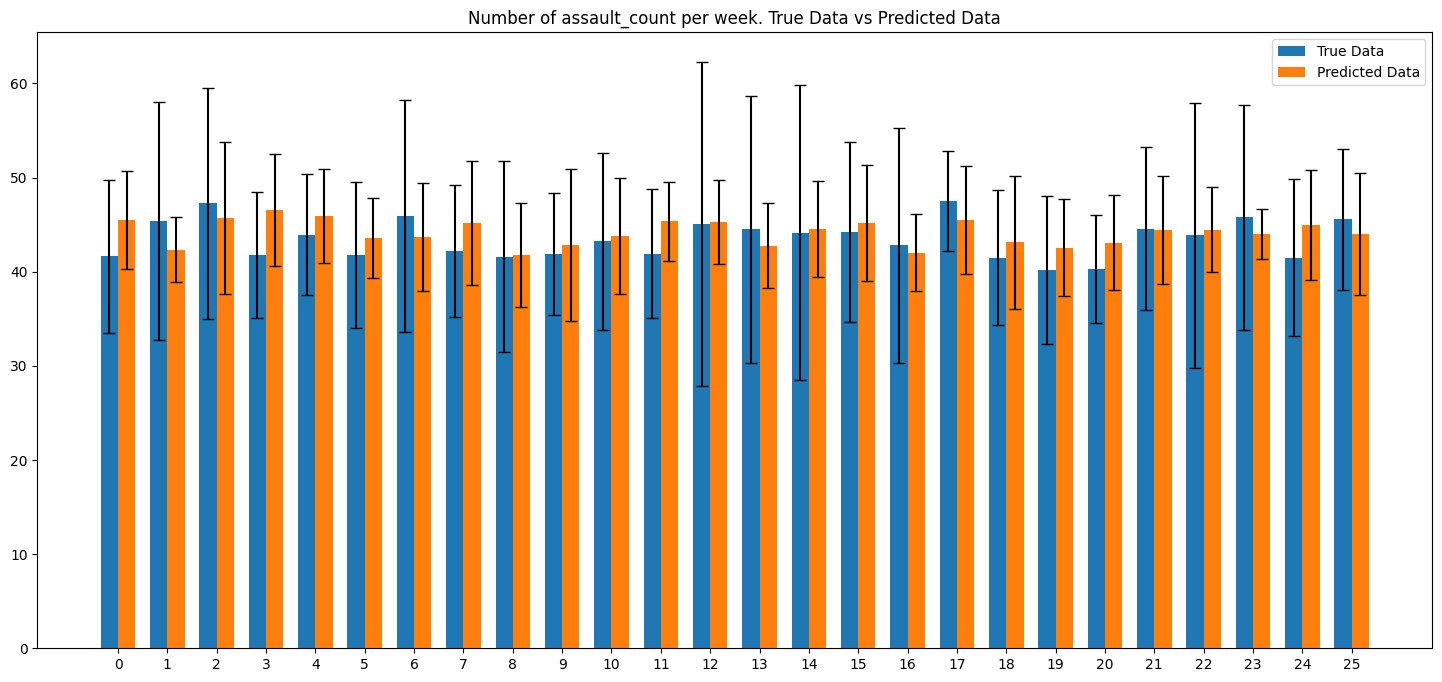

In [18]:
import matplotlib.pyplot as plt
import numpy as np

y_pred = nn.predict(X_test_scaled)

# group the data into 14-point intervals and calculate the mean of each interval
n_intervals = len(y_test) // 14
y_test_mean = np.mean(y_test[:n_intervals*14].reshape((n_intervals, 14)), axis=1)
y_test_std = np.std(y_test[:n_intervals*14].reshape((n_intervals, 14)), axis=1)

y_pred_mean = np.mean(y_pred[:n_intervals*14].reshape((n_intervals, 14)), axis=1)
y_pred_std = np.std(y_pred[:n_intervals*14].reshape((n_intervals, 14)), axis=1)

# set the width of each bar
bar_width = 0.35

# create the x-axis positions for the bars
x_pos_true = np.arange(n_intervals)
x_pos_pred = x_pos_true + bar_width

# plot the test data and predicted data with side-by-side bars
fig, ax = plt.subplots(figsize=(18, 8))
ax.set_title(f"Number of {y_col} per week. True Data vs Predicted Data")
ax.bar(x_pos_true, y_test_mean, width=bar_width, label="True Data", yerr=y_test_std, capsize=4)
ax.bar(x_pos_pred, y_pred_mean, width=bar_width, label="Predicted Data", yerr=y_pred_std, capsize=4)
ax.set_xticks(x_pos_true + bar_width / 2)
ax.set_xticklabels(np.arange(n_intervals))
ax.legend()
plt.show()